## Wrangle WeRateDogs Tweets Data

#### Import necessary packages

In [1]:
import pandas as pd
import requests

### Gather Data

> The first step in gathering data will be to get the twitter archive enhanced dataset to get a list of all the tweets from WeRateDogs twitter accounts, which will used for this project as the base dataset. The file is available to download from Project resources and that is the source of the this data.

In [2]:
df_master = pd.read_csv('twitter-archive-enhanced.csv')
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


> Download the image predidctions dataset from udacity servers.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [4]:
with open('image-predictions.tsv','wb') as file:
    file.write(response.content)

In [5]:
df_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Gather the detail data about tweets using the twitter API

In [10]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [15]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [16]:
tweet_ids = df_master.tweet_id.values
len(tweet_ids)



2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            # print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
df_tweets = pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')
df_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Assess Data

Here the gathered data is assessed for any abnormalities, quality, tidiness etc.

##### Assessing the twitter-archive-enhanced dataset (df_master)

In [7]:
df_master

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
# dataset basic info
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# check for unique value
df_master.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
# check for duplicated records
df_master.duplicated().sum()

0

In [12]:
# check for invlaid denominator i.e 0 or -ve
df_master.query("rating_denominator <= 0").shape[0]

1

In [13]:
# check for reating denominator less than 10 as we have assumed 10 is the standard
df_master.query("rating_denominator <= 9").shape[0]

3

In [16]:
# check for reating numerator is 0 or less
df_master.query("rating_numerator == 0").shape[0]

2

#### Findings on Master Dataset

* The columns like doggo, floofer, pupper, puppo are not necessary. Instead one column Category can serve the purpose
* Some tweets are re-tweets/replies which are not required for the analysis as they re not original tweets
* There is one record for which the rating denominator is 0, which is invalid.
* There are two records for which the rating denominator is less than 10, which is not inline with the standard of 10.
* Some records are replies and not actual tweets 
* Not all columns are necessary for the analysis

##### Assessing the image predictions dataset (df_predictions)

In [17]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
# check for unique values
df_predictions.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [10]:
# check for duplicated records
df_predictions.duplicated().sum()

0

In [8]:
# check for duplicate tweets
df_predictions.tweet_id.duplicated().sum()

0

In [11]:
# check for dog predictions in prediction one
df_predictions.p1_dog.sum()

1532

In [12]:
# check for dog predictions in prediction two
df_predictions.p2_dog.sum()

1553

In [13]:
# check for dog predictions in prediction thre
df_predictions.p2_dog.sum()

1553

In [53]:
# check for records which are predicted as "not a dog" in either of the predictions
df_predictions.query("p1_dog == False and p2_dog == False and p3_dog == False").count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

##### Findings on Image Predictions Dataset

* Column names p1, p2, p3 must be renamed to a more descriptive name.
* Not all tweets part of master databse has image prediction
* Around 324 predictions are not dogs according to either of the predictions and are thus irrelevant for analysis
* The prediction mean for the first prediction is approx 0.6 with a standard deviation of approx 0.2 which is not a great number. For the sake of analysis if all of the predictions accuracy is less than 0.5 then we can ignore such records which will result in a reduced dataset.
* There are 2075 unique tweets but only 2009 unique image url's thats show missing records

##### Assessing the  tweets dataset (df_tweets)

In [7]:
df_tweets

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [9]:
df_tweets.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


#### Findings on tweets dataset


* Columns like contributors, coordinates, geo has no values and thus are of no use
* id column must be renamed to tweet_id for joining purpose. Also the id column is present twice id, id_str
* There are some re-tweets which are not needed
* Not all the columns are necessary for the analysis and thus while merging only the required ones must be considered

### Clean Data

#### Clean the master dataset

In [7]:
# create a copy of the original dataset
df_master_copy = df_master.copy()


In [47]:
# unnecessary columns doggo, floofer, pupper, puppo can be removed
category_columns = ['doggo','floofer','pupper', 'puppo']

In [8]:
# remove the None values to empty so that only the one's required are left
df_master_copy.doggo = df_master_copy.doggo.apply(lambda x: x if x != 'None' else '');
df_master_copy.floofer = df_master_copy.floofer.apply(lambda x: x if x != 'None' else '');
df_master_copy.pupper = df_master_copy.pupper.apply(lambda x: x if x != 'None' else '');
df_master_copy.puppo = df_master_copy.puppo.apply(lambda x: x if x != 'None' else '');

In [9]:
# Test if the None values were replaced by empty string or not
df_master_copy.doggo.value_counts()

         2259
doggo      97
Name: doggo, dtype: int64

In [10]:
# create a new column category to show the category/stage of the dog join 
# using _(underscore) as some rows as more then one category/stage
# and we will be using only one out of them

df_master_copy['category'] = df_master_copy[category_columns].apply(lambda x: '_'.join(x), axis=1)

In [11]:
df_master_copy['category'].value_counts()

___                1976
__pupper_           245
doggo___             83
___puppo             29
doggo__pupper_       12
_floofer__            9
doggo_floofer__       1
doggo___puppo         1
Name: category, dtype: int64

In [12]:
def get_category(x):
    vals = [s for s in x.split('_') if s]
    return vals[0] if len(vals) > 0 else ''

In [13]:
df_master_copy['category'] = df_master_copy.category.apply(lambda x: get_category(x))

In [14]:
# Test thats  the categories column has required values
df_master_copy['category'].value_counts()

           1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: category, dtype: int64

In [15]:
# drop the unnecessary columns a they were merged into one 
df_master_copy.drop(category_columns, axis = 1, inplace=True);

In [18]:
# Test if any of the columns are still there or not
assert 'doggo' not in df_master_copy.columns

In [19]:
# Remove the rows that are retweets
df_master_copy = df_master_copy[df_master_copy.retweeted_status_id.isna()]

In [20]:
# Test if the re-tweets were removed
assert df_master_copy.retweeted_status_id.notnull().sum() == 0

In [21]:
# remove the records that have the denominator less than 10
df_master_copy = df_master_copy[df_master_copy.rating_denominator > 9]

In [22]:
# Test if all the the invalid denominators were removed
assert df_master_copy[df_master_copy.rating_denominator < 10].shape[0] == 0

In [23]:
# Remove all the re-tweet related columns as they are not required
retweet_columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df_master_copy.drop(retweet_columns, axis=1, inplace=True)

In [24]:
# Test if the re-tweet columns were removed
assert 'retweeted_status_id' not in df_master_copy.columns

In [25]:
# some records were replies and not actual tweets, those need to be removed
df_master_copy = df_master_copy[df_master_copy.in_reply_to_status_id.isna()]

In [26]:
# Test if the reply records were removed 
assert df_master_copy.in_reply_to_status_id.notnull().sum() == 0

In [27]:
# remove the reply columns
reply_columns = ['in_reply_to_status_id','in_reply_to_user_id']
df_master_copy.drop(reply_columns, axis = 1, inplace=True)

In [28]:
# Test the reply columns are removed from the dataset
assert 'in_reply_to_status_id' not in df_master_copy.columns

In [29]:
df_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2095 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2095 non-null int64
timestamp             2095 non-null object
source                2095 non-null object
text                  2095 non-null object
expanded_urls         2092 non-null object
rating_numerator      2095 non-null int64
rating_denominator    2095 non-null int64
name                  2095 non-null object
category              2095 non-null object
dtypes: int64(3), object(6)
memory usage: 163.7+ KB


#### Clean the predictions dataset

In [30]:
# create a copy of the dataset
df_predictions_copy =  df_predictions.copy()

In [31]:
# rename the p1,p2,p3 column names to more descriptive names
df_predictions_copy.rename({'p1':'prediction1','p2': 'prediction2',
                      'p3':'prediction3'},axis = 1, inplace=True);

In [34]:
# Test if the columns were renamed 
assert 'p1' not in df_predictions_copy.columns 
assert 'prediction1' in df_predictions_copy.columns

In [35]:
# rename other non descriptive column names
df_predictions_copy.rename({'p1_conf':'prediction1_confirmation',
                            'p2_conf': 'prediction2_confirmation',
                            'p3_conf':'prediction3_confirmation',
                            'p1_dog':'prediction1_isdog',
                            'p2_dog':'prediction2_isdog',
                            'p3_dog':'prediction3_isdog'},axis = 1, inplace=True);

In [36]:
# test if all the columns were renamed properly
assert 'p1_conf' or 'p1_dog' not in df_predictions_copy.columns
assert 'prediction1_confirmation' or 'prediction1_isdog' in df_predictions_copy.columns

In [37]:
# remove the records that are not marked as dogs in any of the 3 predictions
df_predictions_copy = df_predictions_copy.query("prediction1_isdog == True and prediction2_isdog == True and prediction3_isdog == True")

In [38]:
# Test if all the records where all prediction were not dogs were removed
assert df_predictions_copy.query("prediction1_isdog == False and prediction2_isdog == False and prediction3_isdog == False").shape[0] == 0

In [39]:
# define a function to find the most accurage dog prediction out of the 3
import numpy as np
def get_most_accurate_prediction(row):
    preds_conf = []
    predictions = []
    if row.prediction1_isdog == True:
        preds_conf.append(row.prediction1_confirmation)
        predictions.append(row.prediction1)
    if row.prediction2_isdog == True:
        preds_conf.append(row.prediction2_confirmation)
        predictions.append(row.prediction2)
    if row.prediction3_isdog == True:
        preds_conf.append(row.prediction3_confirmation)
        predictions.append(row.prediction3)
    prediction_max = np.max(preds_conf)
    prediction = predictions[preds_conf.index(prediction_max)]
    result = (prediction , prediction_max)
    return result

In [40]:
# add new prediction and prediction_confirmation columns which will be the
# calculated columns for the prediction with maximum confirmation
df_predictions_copy['prediction'] = df_predictions_copy.prediction1
df_predictions_copy['confirmation'] = df_predictions_copy.prediction1_confirmation
df_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id                    1243 non-null int64
jpg_url                     1243 non-null object
img_num                     1243 non-null int64
prediction1                 1243 non-null object
prediction1_confirmation    1243 non-null float64
prediction1_isdog           1243 non-null bool
prediction2                 1243 non-null object
prediction2_confirmation    1243 non-null float64
prediction2_isdog           1243 non-null bool
prediction3                 1243 non-null object
prediction3_confirmation    1243 non-null float64
prediction3_isdog           1243 non-null bool
prediction                  1243 non-null object
confirmation                1243 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 120.2+ KB


In [41]:
# test if the columns were added successfully
assert 'prediction' and 'confirmation' in df_predictions_copy.columns

In [42]:
# extract the best prediction into the newly added columns
for index, row in df_predictions_copy.iterrows():
    result = get_most_accurate_prediction(row)
    row.prediction = result[0]
    row.confirmation = result[1]

In [43]:
# remmov all other prediction columns apart from the new ones deduced 
# i.e keep only prediction and confirmation
drop_cols = ['prediction1','prediction2','prediction3','prediction1_confirmation',
            'prediction2_confirmation','prediction3_confirmation','prediction1_isdog',
            'prediction2_isdog','prediction3_isdog']
df_predictions_copy.drop(drop_cols, axis=1, inplace=True)

In [44]:
# Test if all the columns were dropped
assert tuple(drop_cols) not in df_predictions_copy.columns

In [45]:
df_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id        1243 non-null int64
jpg_url         1243 non-null object
img_num         1243 non-null int64
prediction      1243 non-null object
confirmation    1243 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 58.3+ KB


#### Clean the tweets dataset 

In [57]:
# create a copy of the original dataset
df_tweets_copy = df_tweets.copy()

In [58]:
# remove un necessary columns
remove_cols = ['contributors','coordinates','geo']
df_tweets_copy.drop(remove_cols, axis=1, inplace=True)

In [49]:
assert tuple(remove_cols) not in df_tweets_copy.columns

In [71]:
# remov the re-tweets
df_tweets_copy = df_tweets_copy[df_tweets_copy.retweeted_status.isna()]

In [72]:
# test if the re-tweets were removed
assert df_tweets_copy[df_tweets_copy.retweeted_status.notnull()].shape[0]==0

In [74]:
# rename column id to tweet_id for merging purpose
df_tweets_copy.rename({'id': 'tweet_id'}, axis=1, inplace=True)

In [76]:
# test if the columns was renamed
assert 'tweet_id' in  df_tweets_copy.columns

In [78]:
# remove the duplicate column id_str and other ir-relevant columns
# more columns can be removed but for now we will take care of this when 
# merging this datset with the master one
remove_columns = ['id_str','retweeted_status']
df_tweets_copy.drop(remove_columns, axis=1, inplace=True)

In [79]:
#test if the columns were removed or not
assert tuple(remove_columns) not in df_tweets_copy.columns

In [85]:
# remove the records that are replies
df_tweets_copy = df_tweets_copy[df_tweets_copy.in_reply_to_status_id.isna()]

In [88]:
# extract only the required columns for the sake of analysis
df_tweets_copy = df_tweets_copy[['tweet_id','favorite_count','retweet_count']]

In [89]:
df_tweets_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2097 non-null int64
favorite_count    2097 non-null int64
retweet_count     2097 non-null int64
dtypes: int64(3)
memory usage: 65.5 KB


### Storing Data

In this section we will store all the cleaned dataset for future use

In [90]:
# save the master cleaned datasets
df_master_copy.to_csv('twitter_archive_clean.csv',index=False, encoding = 'utf-8')

In [91]:
# save the predictions cleaned datasets
df_predictions_copy.to_csv('image_predictions_clean.csv',index=False, encoding = 'utf-8')

In [92]:
# save the tweets cleaned datasets
df_tweets_copy.to_csv('tweets_clean.csv',index=False, encoding = 'utf-8')

### Merge Datasets for further processing

Merge all the cleaned datasets. Use inner joins in order to remove any missing records or any irrelevant data.

In [104]:
# Merge mastre archive and predictions dataset 
df_twitter_merged = df_master_copy.merge(df_predictions_copy ,how='inner', on='tweet_id')

In [106]:
df_twitter_merged = df_twitter_merged.merge(df_tweets_copy ,how='inner', on='tweet_id')

In [97]:
# Save the merge dataset into a CSV for future use.
df_twitter_merged.to_csv('twitter_archive_clean.csv',index=False, encoding='utf-8')

In [107]:
df_twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 0 to 1191
Data columns (total 15 columns):
tweet_id              1192 non-null int64
timestamp             1192 non-null object
source                1192 non-null object
text                  1192 non-null object
expanded_urls         1192 non-null object
rating_numerator      1192 non-null int64
rating_denominator    1192 non-null int64
name                  1192 non-null object
category              1192 non-null object
jpg_url               1192 non-null object
img_num               1192 non-null int64
prediction            1192 non-null object
confirmation          1192 non-null float64
favorite_count        1192 non-null int64
retweet_count         1192 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 149.0+ KB


In [205]:
# Stroe the merged dataset to a csv for future use.
df_twitter_merged.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

## Analysis and Data Visualization

As part of this analysis below question will be answered
* Which is the most liked dog and least liked dog
* Which dog was re-tweeted maximum number of times
* which is the highest rated dog
* Which is the most tweeted dog category/stage (doggo, pupper etc)

In [1]:
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df_twitter_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 15 columns):
tweet_id              1192 non-null int64
timestamp             1192 non-null object
source                1192 non-null object
text                  1192 non-null object
expanded_urls         1192 non-null object
rating_numerator      1192 non-null int64
rating_denominator    1192 non-null int64
name                  1192 non-null object
category              189 non-null object
jpg_url               1192 non-null object
img_num               1192 non-null int64
prediction            1192 non-null object
confirmation          1192 non-null float64
favorite_count        1192 non-null int64
retweet_count         1192 non-null int64
dtypes: float64(1), int64(6), object(8)
memory usage: 139.8+ KB


In [113]:
df_twitter_merged.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,confirmation,favorite_count,retweet_count
count,1.192000e+03,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000,1192.000000
mean,7.420491e+17,11.469799,10.487416,1.224832,0.627935,9339.776007,2766.843121
std,6.916671e+16,6.934194,6.141202,0.582234,0.253447,12595.495522,4532.428682
min,6.660209e+17,2.000000,10.000000,1.000000,0.044333,81.000000,16.000000
25%,6.786780e+17,10.000000,10.000000,1.000000,0.417022,2254.500000,652.750000
50%,7.157150e+17,11.000000,10.000000,1.000000,0.632663,4547.000000,1438.000000
75%,7.998538e+17,12.000000,10.000000,1.000000,0.855136,11748.250000,3230.250000
max,8.921774e+17,165.000000,150.000000,4.000000,0.999885,132810.000000,56625.000000


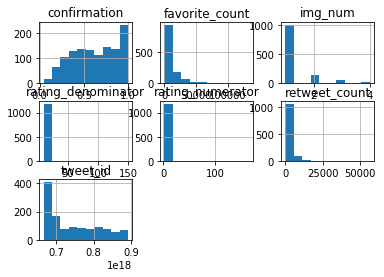

In [169]:
df_twitter_merged.hist();

Text(0,0.5,'Number of tweets')

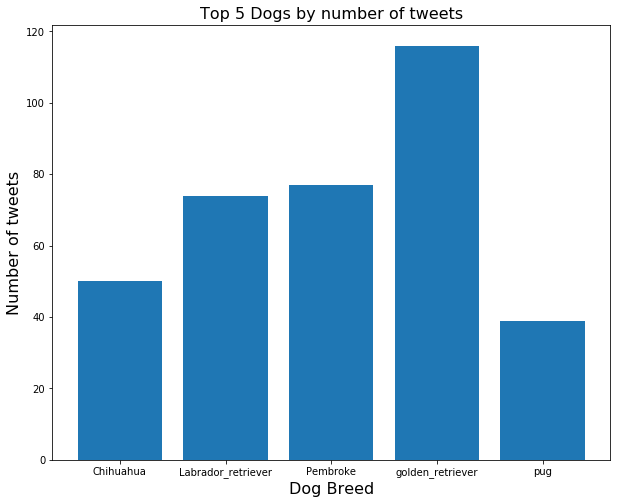

In [190]:
# which dog has got the most number of tweets
top_5_dogs = df_twitter_merged.prediction.value_counts().head()
plt.figure(figsize=(10,8))
plt.bar(top_5_dogs.index, top_5_dogs)
plt.title('Top 5 Dogs by number of tweets', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Number of tweets', fontsize=16)

Text(0,0.5,'Number of likes')

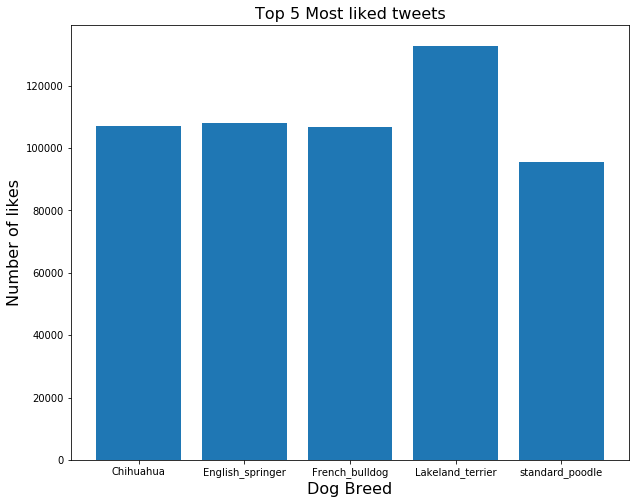

In [189]:
# top 5 liked tweets
top5_tweets = df_twitter_merged.sort_values(by='favorite_count', ascending=False).head()
top_5_dogs = df_twitter_merged.prediction.value_counts().head()
plt.figure(figsize=(10,8))
plt.bar(top5_tweets.prediction, top5_tweets.favorite_count)
plt.title('Top 5 Most liked tweets', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Number of likes', fontsize=16)

Text(0,0.5,'Number of likes')

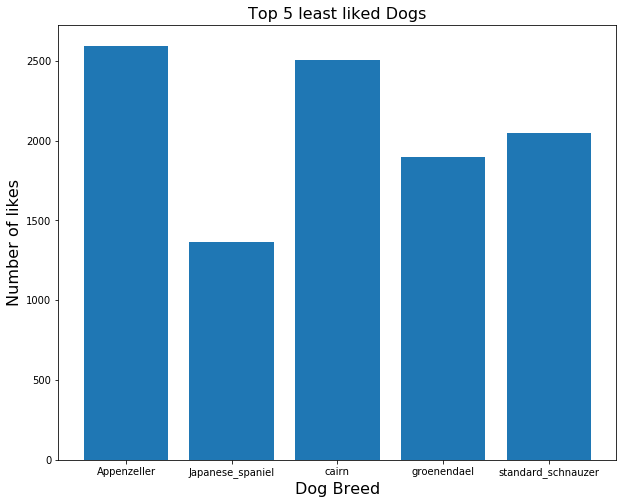

In [4]:
# which is the least liked dog
most_liked_dogs = df_twitter_merged.groupby('prediction').favorite_count.sum().sort_values(ascending=True).head()
plt.figure(figsize=(10,8))
plt.bar(most_liked_dogs.index , most_liked_dogs)
plt.title('Top 5 least liked Dogs', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Number of likes', fontsize=16)

Text(0,0.5,'Number of likes')

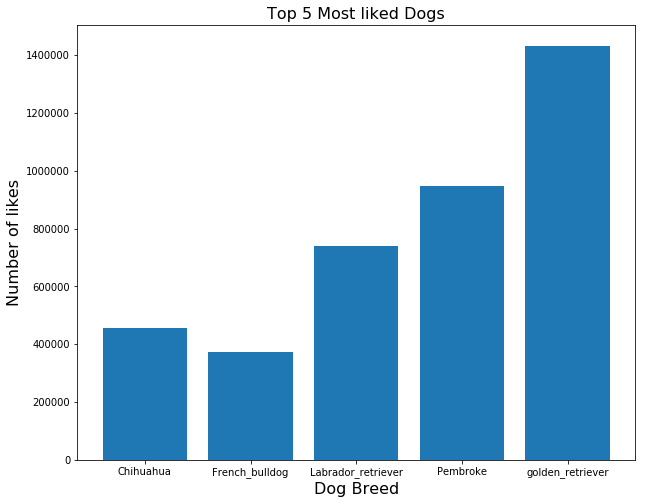

In [3]:
# which is the most liked dog
most_liked_dogs = df_twitter_merged.groupby('prediction').favorite_count.sum().sort_values(ascending=False).head()
plt.figure(figsize=(10,8))
plt.bar(most_liked_dogs.index , most_liked_dogs)
plt.title('Top 5 Most liked Dogs', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Number of likes', fontsize=16)

Text(0,0.5,'Number of tweets')

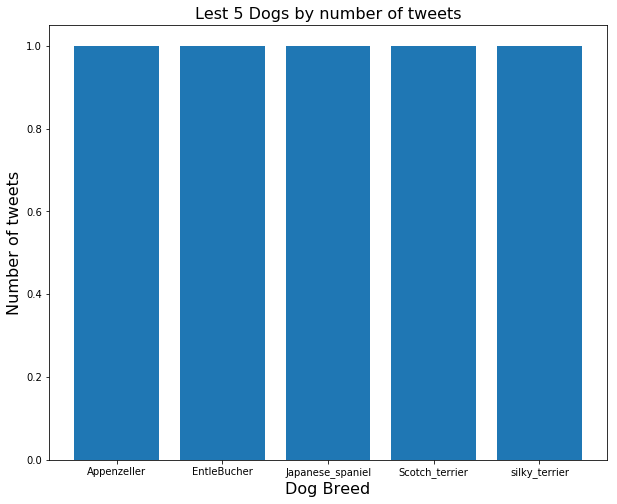

In [197]:
# which dog has got the least number of tweets
bottom_5_dogs = df_twitter_merged.prediction.value_counts().tail()
plt.figure(figsize=(10,8))
plt.bar(bottom_5_dogs.index, bottom_5_dogs)
plt.title('Lest 5 Dogs by number of tweets', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Number of tweets', fontsize=16)

Text(0,0.5,'Number of Re-tweets')

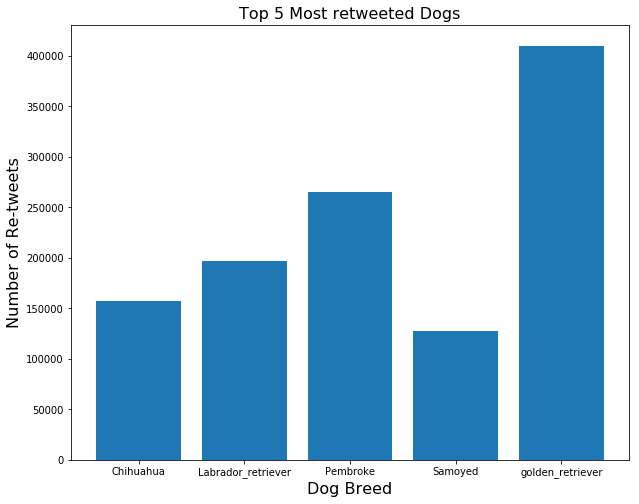

In [200]:
# which is the most re-tweeted dog
top_retweeted = df_twitter_merged.groupby('prediction').retweet_count.sum().sort_values(ascending=False).head()

plt.figure(figsize=(10,8))
plt.bar(top_retweeted.index , top_retweeted)
plt.title('Top 5 Most retweeted Dogs', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Number of Re-tweets', fontsize=16)

Text(0,0.5,'Number of Re-tweets')

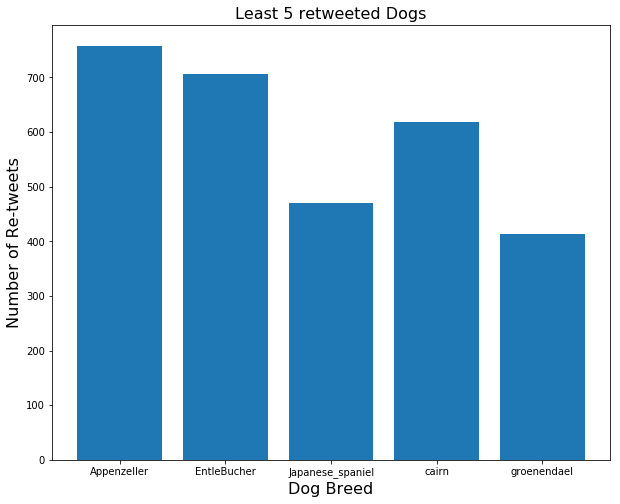

In [204]:
# which is the least re-tweeted dog
least_retweeetd = df_twitter_merged.groupby('prediction').retweet_count.sum().sort_values(ascending=True).head()
plt.figure(figsize=(10,8))
plt.bar(least_retweeetd.index , least_retweeetd)
plt.title('Least 5 retweeted Dogs', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Number of Re-tweets', fontsize=16)

Text(0,0.5,'Cumulative Rating')

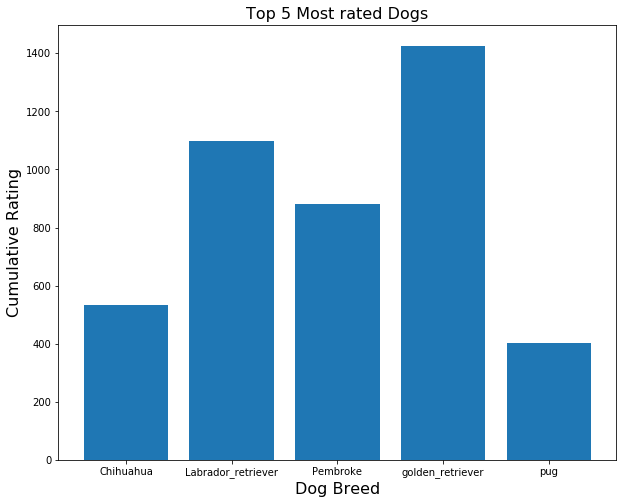

In [220]:
# which is the highest rated dog
top_rated = df_twitter_merged.groupby('prediction').rating_numerator.sum().sort_values(ascending=False).head()
plt.figure(figsize=(10,8))
plt.bar(top_rated.index , top_rated)
plt.title('Top 5 Most rated Dogs', fontsize=16)
plt.xlabel('Dog Breed', fontsize=16)
plt.ylabel('Cumulative Rating', fontsize=16)

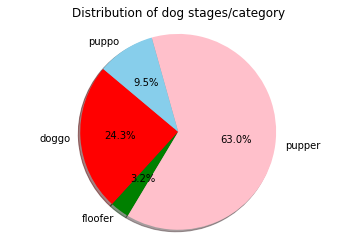

In [33]:
# whic is the most like dog category/stage (doggo, pupper etc)
dog_category = df_twitter_merged.groupby('category').count()
labels = list(dog_category.index)
sizes = list(dog_category.tweet_id)
colors = ['red', 'green', 'pink', 'skyblue']
plt.pie(sizes,labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of dog stages/category')
plt.axis('equal')
plt.show()

### Analyis Result

* Which is the most liked dog and least liked dog
> Golden Retriever is the most liked dog and Japanese Spaniel is the least liked dog
* Which dog was re-tweeted maximum number of times
> Golden Retriever is the most re-tweeted dog
* which is the highest rated dog
>  Golden Retriever is cumulatively highest rated dog

* Which is the most tweeted dog category/stage (doggo, pupper etc)
> Pupper is the most tweeted dog category/stage (63% tweets)